In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer

In [134]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv').drop('TeledyneRampWeight',axis=1)

vars_to_drop = ['FlightID','FlightNumber','AircraftRegistration','ScheduledRoute','DepartureScheduled','ArrivalScheduled',
'AircraftTypeGroup','AOCDescription','ServiceDescription','Carrier','Infants']

def basic_preprocess(data, vars_to_drop):
    data = data.drop(vars_to_drop,axis=1)
    return data

def power_transform(train_data, test_data):
    to_transform = ['BlockTimeScheduled','Adults','Children','Freight','Bags']
    pt = PowerTransformer(method='yeo-johnson',standardize=False)
    pt_fit = pt.fit_transform(train_data[to_transform])
    pt_fit_t = pt.transform(test_data[to_transform])
    pt_train = pd.DataFrame(pt_fit,columns=to_transform)
    pt_test = pd.DataFrame(pt_fit_t,columns=to_transform)
    train_data = pd.concat([train_data[['AircraftCapacity','TeledyneRampWeight']],pt_train],axis=1)
    test_data = pd.concat([test_data['AircraftCapacity'],pt_test],axis=1)
    return train_data, test_data

train = basic_preprocess(train, vars_to_drop)
test = basic_preprocess(test, vars_to_drop)

train, test = power_transform(train, test)

In [135]:
train = train[(train.TeledyneRampWeight > 45000)&(train.TeledyneRampWeight < 100000)]

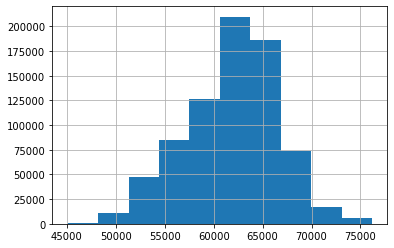

In [137]:
train.TeledyneRampWeight.hist();

In [148]:
train_df = pd.get_dummies(train,columns=['AircraftCapacity'],drop_first=True)
test_df = pd.get_dummies(test,columns=['AircraftCapacity'],drop_first=True)

X_train = train_df.drop('TeledyneRampWeight',axis=1)
y_train = train_df['TeledyneRampWeight']
X_test = test_df

In [150]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [152]:
submission['TeledyneRampWeight'] = y_pred
submission.to_csv('benchmark.csv',index=False)